# Install packages

In [550]:
# install.packages("fmsb", repos = "http://cran.us.r-project.org") 
install.packages("ggplot2", repos = "http://cran.us.r-project.org") 

Installing package into 'C:/Users/emara/Documents/R/win-library/3.4'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\emara\AppData\Local\Temp\RtmpuIWC3C\downloaded_packages


# Understanding Source of Data

In [869]:
data(LifeCycleSavings)
help(LifeCycleSavings)

# Load Data

In [1]:
data(LifeCycleSavings)

In [2]:
head(LifeCycleSavings)

,sr,pop15,pop75,dpi,ddpi
Australia,11.43,29.35,2.87,2329.68,2.87
Austria,12.07,23.32,4.41,1507.99,3.93
Belgium,13.17,23.80,4.43,2108.47,3.82
Bolivia,5.75,41.89,1.67,189.13,0.22
Brazil,12.88,42.19,0.83,728.47,4.56
Canada,8.79,31.72,2.85,2982.88,2.43


In [3]:
nrow(LifeCycleSavings)

[1] 50

# Initial Data Analysis

### Basic Statistics

In [4]:
summary(LifeCycleSavings)

       sr             pop15           pop75            dpi         
 Min.   : 0.600   Min.   :21.44   Min.   :0.560   Min.   :  88.94  
 1st Qu.: 6.970   1st Qu.:26.21   1st Qu.:1.125   1st Qu.: 288.21  
 Median :10.510   Median :32.58   Median :2.175   Median : 695.66  
 Mean   : 9.671   Mean   :35.09   Mean   :2.293   Mean   :1106.76  
 3rd Qu.:12.617   3rd Qu.:44.06   3rd Qu.:3.325   3rd Qu.:1795.62  
 Max.   :21.100   Max.   :47.64   Max.   :4.700   Max.   :4001.89  
      ddpi       
 Min.   : 0.220  
 1st Qu.: 2.002  
 Median : 3.000  
 Mean   : 3.758  
 3rd Qu.: 4.478  
 Max.   :16.710  

### Scatter plot, Variance-covariance matrix, correlation matrix

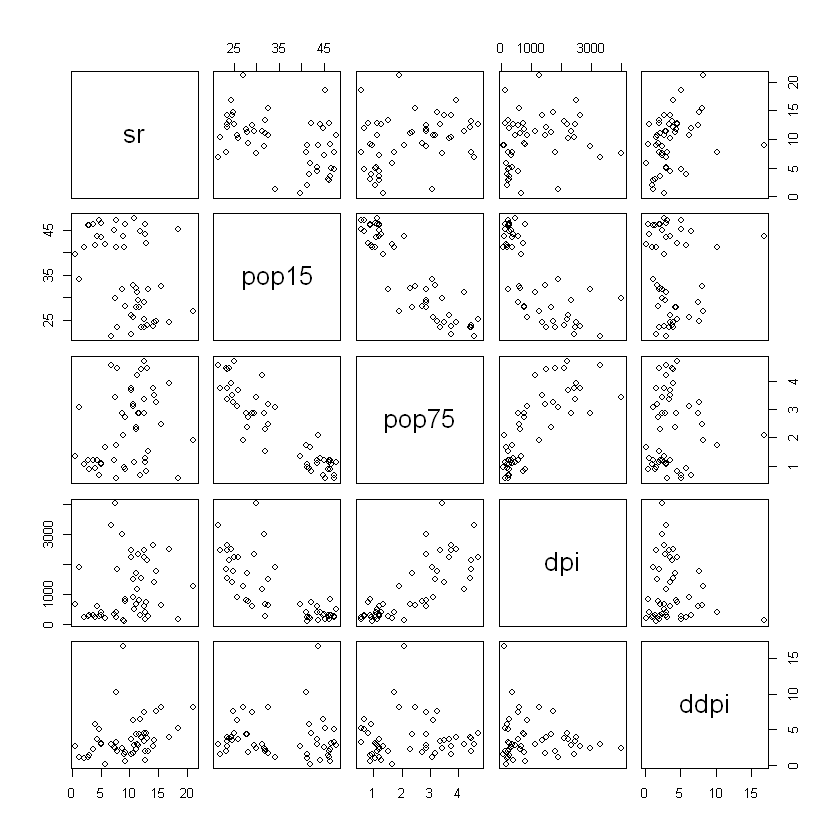

In [5]:
plot(LifeCycleSavings)

In [6]:
cov(LifeCycleSavings)

,sr,pop15,pop75,dpi,ddpi
sr,20.074046,-18.678638,1.83049898,978.2825,3.91901061
pop15,-18.678638,83.754110,-10.73166612,-6857.2360,-1.25610710
pop75,1.830499,-10.731666,1.66609082,1006.5607,0.09379918
dpi,978.282487,-6857.235988,1006.56074980,981821.1551,-368.21350800
ddpi,3.919011,-1.256107,0.09379918,-368.2135,8.23615739


In [7]:
cor(LifeCycleSavings)

,sr,pop15,pop75,dpi,ddpi
sr,1.0000000,-0.45553809,0.31652112,0.2203589,0.30478716
pop15,-0.4555381,1.00000000,-0.90847871,-0.7561881,-0.04782569
pop75,0.3165211,-0.90847871,1.00000000,0.7869995,0.02532138
dpi,0.2203589,-0.75618810,0.78699951,1.0000000,-0.12948552
ddpi,0.3047872,-0.04782569,0.02532138,-0.1294855,1.00000000


- We can see that the variance of `pop75` and `ddpi` seems to be really small, maybe we should visualize their distributions using **Density Estimation**. For the other three variables, we can use **Boxplot**.

- Strong correlation between `pop75` and `ddpi`

### Visualizing distribution of each variable

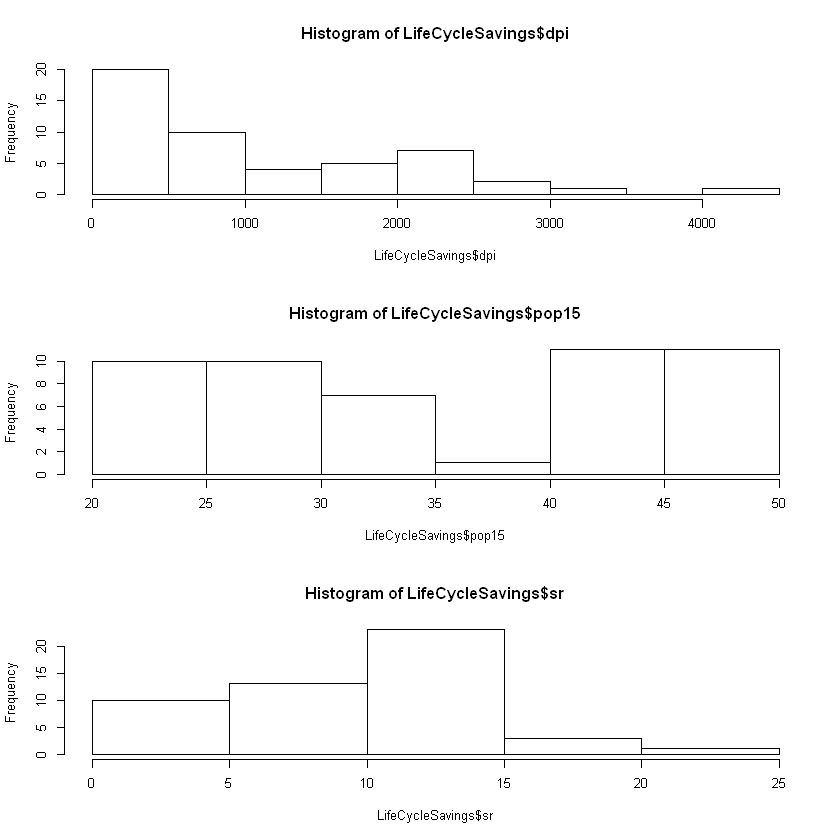

In [8]:
layout(matrix(3:1,ncol=1))
hist(LifeCycleSavings$sr, nclass = 6)
hist(LifeCycleSavings$pop15, nclass = 6)
hist(LifeCycleSavings$dpi, nclass = 6)

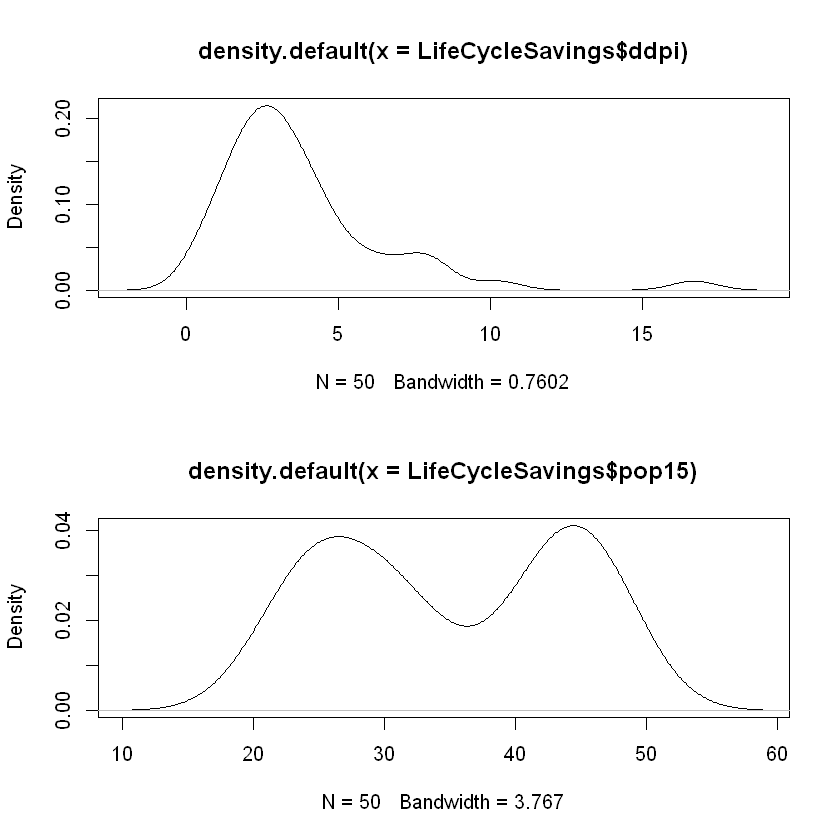

In [9]:
layout(matrix(2:1,ncol=1))
plot(density(LifeCycleSavings$pop15))
plot(density(LifeCycleSavings$ddpi))

### Remove outlier

We found them from models' cook distance. 

In [10]:
row.names(LifeCycleSavings)

[1] "Australia"      "Austria"        "Belgium"        "Bolivia"       
 [5] "Brazil"         "Canada"         "Chile"          "China"         
 [9] "Colombia"       "Costa Rica"     "Denmark"        "Ecuador"       
[13] "Finland"        "France"         "Germany"        "Greece"        
[17] "Guatamala"      "Honduras"       "Iceland"        "India"         
[21] "Ireland"        "Italy"          "Japan"          "Korea"         
[25] "Luxembourg"     "Malta"          "Norway"         "Netherlands"   
[29] "New Zealand"    "Nicaragua"      "Panama"         "Paraguay"      
[33] "Peru"           "Philippines"    "Portugal"       "South Africa"  
[37] "South Rhodesia" "Spain"          "Sweden"         "Switzerland"   
[41] "Turkey"         "Tunisia"        "United Kingdom" "United States" 
[45] "Venezuela"      "Zambia"         "Jamaica"        "Uruguay"       
[49] "Libya"          "Malaysia"

In [11]:
which(rownames(LifeCycleSavings) %in% c("Japan", "Libya", "Jamaica", "Zambia"))

[1] 23 46 47 49

In [12]:
LifeCycleSavings = LifeCycleSavings[-c(23, 46, 47, 49), ] 

In [13]:
# we should find nothing now
which(rownames(LifeCycleSavings) %in% c("Japan", "Libya", "Jamaica", "Zambia"))

integer(0)

### Standardizing explanatory variables

In [14]:
# LifeCycleSavings$pop15 <- (LifeCycleSavings$pop15 - mean(LifeCycleSavings$pop15)) / sd(LifeCycleSavings$pop15)
# LifeCycleSavings$pop75 <- (LifeCycleSavings$pop75 - mean(LifeCycleSavings$pop75)) / sd(LifeCycleSavings$pop75)
# LifeCycleSavings$dpi <- (LifeCycleSavings$dpi - mean(LifeCycleSavings$dpi)) / sd(LifeCycleSavings$dpi)
# LifeCycleSavings$ddpi <- (LifeCycleSavings$ddpi - mean(LifeCycleSavings$ddpi)) / sd(LifeCycleSavings$ddpi)

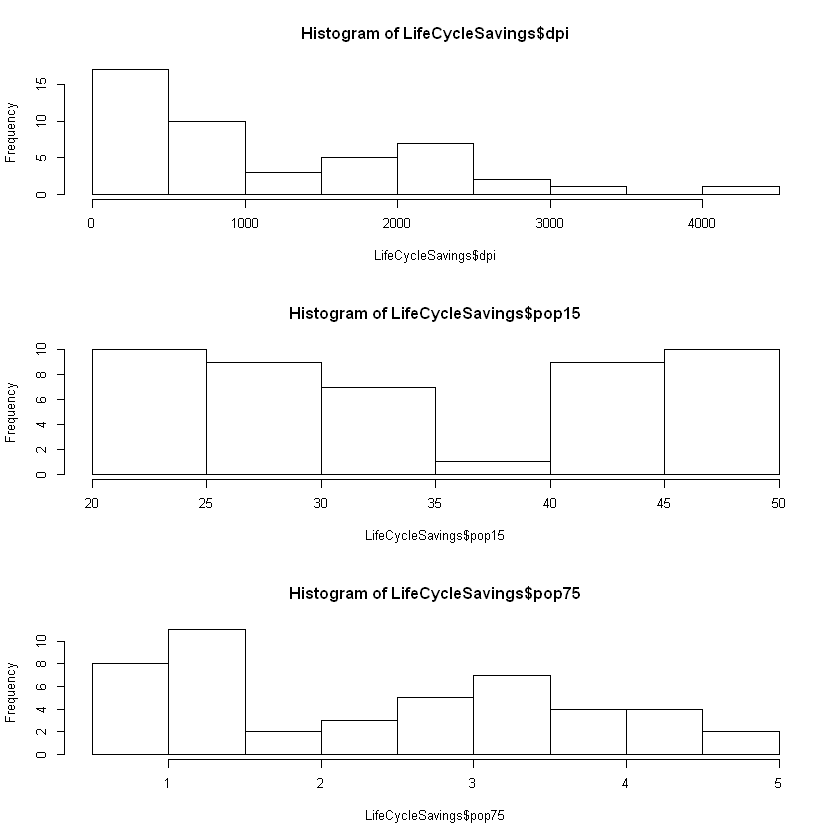

In [15]:
layout(matrix(3:1,ncol=1))
hist(LifeCycleSavings$pop75, nclass = 6)
hist(LifeCycleSavings$pop15, nclass = 6)
hist(LifeCycleSavings$dpi, nclass = 6)

### Modeling

In [16]:
dpi = LifeCycleSavings$dpi
sr = LifeCycleSavings$sr
ddpi = LifeCycleSavings$ddpi
pop15 = LifeCycleSavings$pop15
pop75 = LifeCycleSavings$pop75

In [17]:
models = new.env()
models$default_model = lm(sr ~ pop15 + pop75 + dpi + ddpi, data = LifeCycleSavings)

models$model_ddpi_pop15 = lm(sr ~ I(pop15^2), data = LifeCycleSavings)

models$model_dpi_pop75 = lm(sr ~ pop75*dpi, data = LifeCycleSavings)

In [18]:
print(ls.str(models), max.level = 0)

default_model : List of 12
model_ddpi_pop15 : List of 12
model_dpi_pop75 : List of 12


### Relationship between sr and dpi

In [19]:
# models$model_dpi = lm(sr ~ sqrt(50000000 - I((dpi-2100)^2)), data = LifeCycleSavings)
# models$model_dpi = lm(sr ~ I(dpi^0.0001), data = LifeCycleSavings)
# models$model_dpi = lm(sr ~ I(log(log(dpi))), data = LifeCycleSavings)
# models$model_dpi = lm(sr ~ dpi + I(I(dpi^2)*(dpi > 700)) + I(dpi*(dpi <= 700)), data = LifeCycleSavings)
models$model_dpi = lm(sr ~ dpi + I(dpi*(dpi < 400)) + I(((dpi) + I(dpi^3))*(dpi > 700)*(dpi < 2700)), data = LifeCycleSavings)

summary(models$model_dpi)


Call:
lm(formula = sr ~ dpi + I(dpi * (dpi < 400)) + I(((dpi) + I(dpi^3)) * 
    (dpi > 700) * (dpi < 2700)), data = LifeCycleSavings)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6749 -1.7499  0.5063  1.7252  6.7751 

Coefficients:
                                                     Estimate Std. Error
(Intercept)                                         1.072e+01  1.188e+00
dpi                                                -8.769e-04  7.724e-04
I(dpi * (dpi < 400))                               -1.582e-02  5.313e-03
I(((dpi) + I(dpi^3)) * (dpi > 700) * (dpi < 2700))  2.763e-10  1.312e-10
                                                   t value Pr(>|t|)    
(Intercept)                                          9.016 2.25e-11 ***
dpi                                                 -1.135   0.2627    
I(dpi * (dpi < 400))                                -2.978   0.0048 ** 
I(((dpi) + I(dpi^3)) * (dpi > 700) * (dpi < 2700))   2.105   0.0413 *  
---
Signif. codes:  0 '***' 0.

In [20]:
AIC(models$model_dpi)
BIC(models$model_dpi)

[1] 252.6866

[1] 261.8298

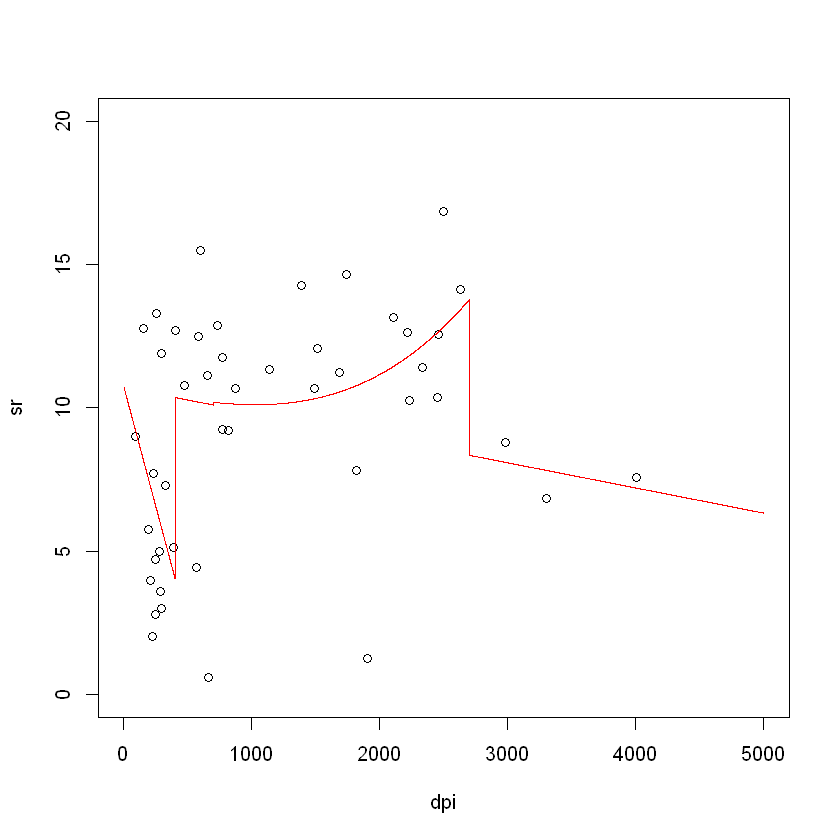

In [21]:
newdat = data.frame(sr, dpi)
newdat = newdat[order(dpi),] 
pred = predict(models$model_dpi, newdata = data.frame(dpi = c(1:5000)))
plot(sr ~ dpi, xlim = c(0, 5000), ylim = c(0, 20))
lines(x = c(1:5000), y = pred, col = 'red')

### Relationship between pop15 and sr

In [22]:
models$model_pop15 = lm(sr ~ log(pop15), data = LifeCycleSavings)
summary(models$model_pop15)


Call:
lm(formula = sr ~ log(pop15), data = LifeCycleSavings)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8958 -2.2945  0.4243  2.0335  6.0581 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   37.242      6.820   5.461 2.08e-06 ***
log(pop15)    -7.960      1.936  -4.111 0.000169 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.539 on 44 degrees of freedom
Multiple R-squared:  0.2775,	Adjusted R-squared:  0.2611 
F-statistic:  16.9 on 1 and 44 DF,  p-value: 0.0001693


In [23]:
AIC(models$model_pop15)
BIC(models$model_pop15)

[1] 250.7776

[1] 256.2635

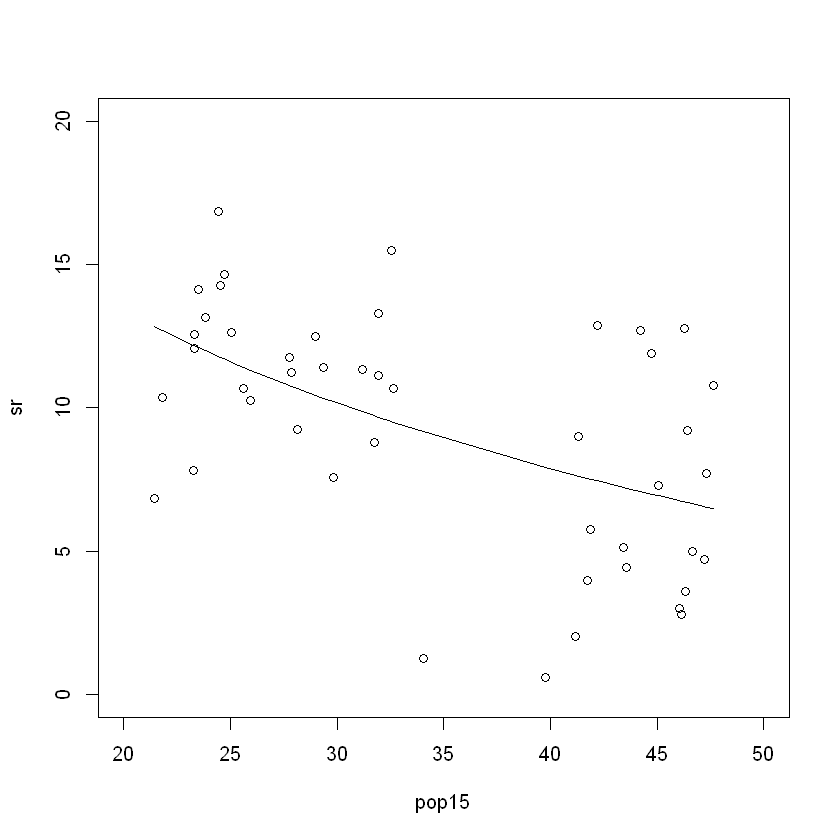

In [24]:
newdat = data.frame(sr, pop15)
newdat = newdat[order(pop15),] 
pred = predict(models$model_pop15, newdata = newdat)
plot(sr ~ pop15, xlim = c(20, 50), ylim = c(0, 20))
with(newdat, lines(x = pop15, y = pred))

### Relationship between pop75 and sr

In [25]:
models$model_pop75 = lm(sr ~ log(pop75), data = LifeCycleSavings)
summary(models$model_pop75)


Call:
lm(formula = sr ~ log(pop75), data = LifeCycleSavings)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3215 -2.9331  0.2496  2.1733  6.0844 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.3350     0.8020   9.146 9.74e-12 ***
log(pop75)    2.8948     0.8672   3.338  0.00172 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.719 on 44 degrees of freedom
Multiple R-squared:  0.2021,	Adjusted R-squared:  0.184 
F-statistic: 11.14 on 1 and 44 DF,  p-value: 0.001723


In [26]:
AIC(models$model_pop75)
BIC(models$model_pop75)

[1] 255.3451

[1] 260.831

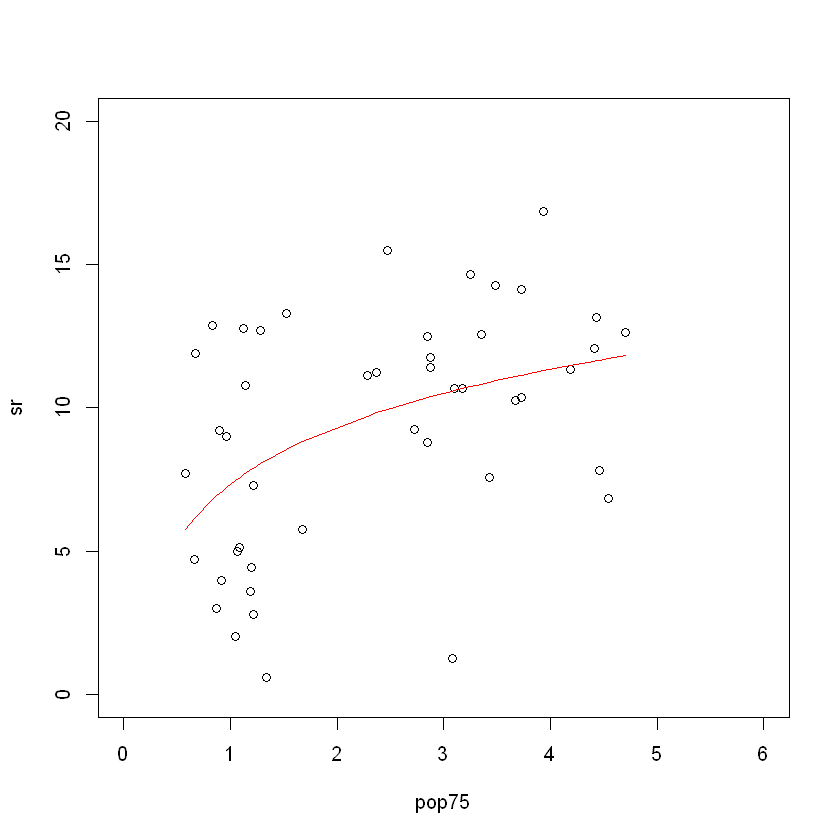

In [27]:
newdat = data.frame(sr, pop75)
newdat = newdat[order(pop75),] 
pred = predict(models$model_pop75, newdata = newdat)
plot(sr ~ pop75, xlim = c(0, 6), ylim = c(0, 20))
with(newdat, lines(x = pop75, y = pred, col = 'red'))

### Relationship between ddpi and sr

In [28]:
models$model_ddpi = lm(sr ~ ddpi, data = LifeCycleSavings)
summary(models$model_ddpi)


Call:
lm(formula = sr ~ ddpi, data = LifeCycleSavings)

Residuals:
   Min     1Q Median     3Q    Max 
-8.206 -2.081  1.049  2.429  6.861 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.4119     1.1195   5.727 8.48e-07 ***
ddpi          0.8966     0.3021   2.968  0.00483 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.801 on 44 degrees of freedom
Multiple R-squared:  0.1668,	Adjusted R-squared:  0.1479 
F-statistic: 8.811 on 1 and 44 DF,  p-value: 0.004831


In [29]:
AIC(models$model_ddpi)
BIC(models$model_ddpi)

[1] 257.3338

[1] 262.8197

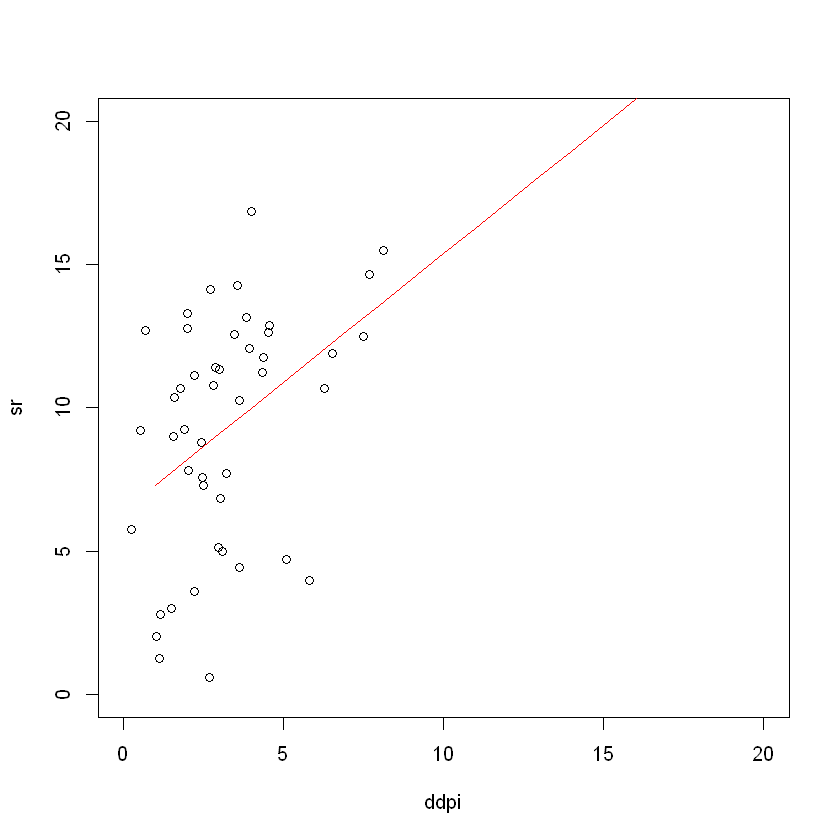

In [30]:
newdat = data.frame(sr, ddpi)
newdat = newdat[order(ddpi),] 
pred = predict(models$model_ddpi, newdata = data.frame(ddpi = c(1:20)))
plot(sr ~ ddpi, xlim = c(0, 20), ylim = c(0, 20))
lines(x = c(1:20), y = pred, col = 'red')

### Combined Models

In [31]:
models$combined_model_1 = lm(sr ~ ddpi + log(pop15), data = LifeCycleSavings)

In [32]:
summary(models$combined_model_1)


Call:
lm(formula = sr ~ ddpi + log(pop15), data = LifeCycleSavings)

Residuals:
   Min     1Q Median     3Q    Max 
-7.173 -2.389  0.179  2.213  6.948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  31.2420     6.9855   4.472 5.58e-05 ***
ddpi          0.6475     0.2768   2.339  0.02406 *  
log(pop15)   -6.8429     1.9056  -3.591  0.00084 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.372 on 43 degrees of freedom
Multiple R-squared:  0.359,	Adjusted R-squared:  0.3292 
F-statistic: 12.04 on 2 and 43 DF,  p-value: 7.027e-05


In [33]:
fmsb::VIF(models$combined_model_1)

[1] 1.560179

In [34]:
AIC(models$combined_model_1)
BIC(models$combined_model_1)

[1] 247.269

[1] 254.5836

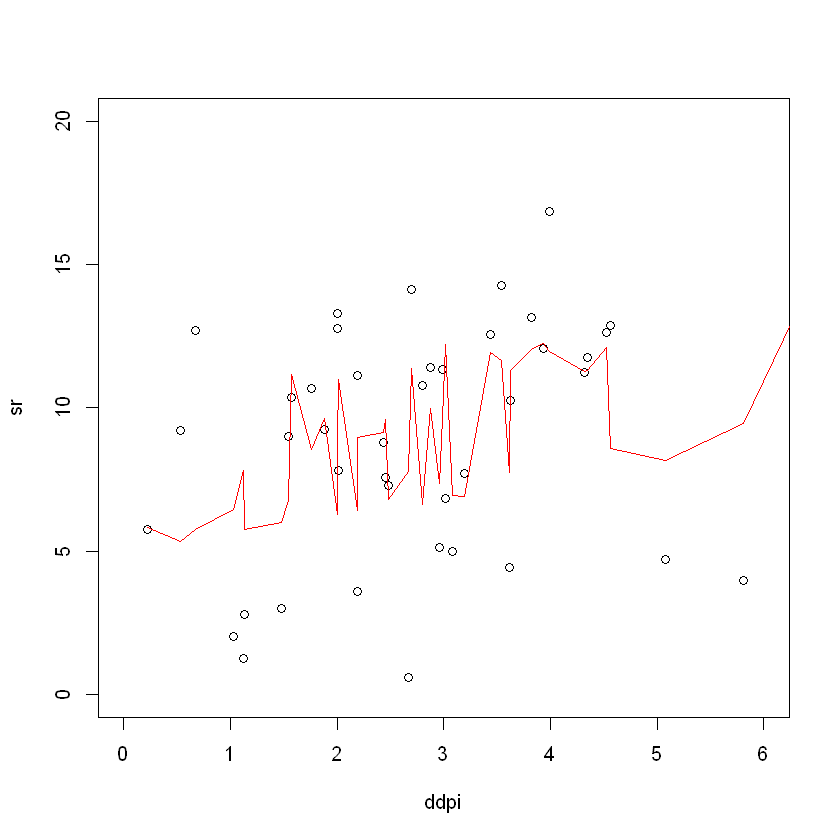

In [35]:
newdat = data.frame(sr, ddpi, pop15)
newdat = newdat[order(ddpi),] 
pred = predict(models$combined_model_1, newdata = newdat)
plot(sr ~ ddpi, xlim = c(0, 6), ylim = c(0, 20))
with(newdat, lines(x = ddpi, y = pred, col = 'red'))

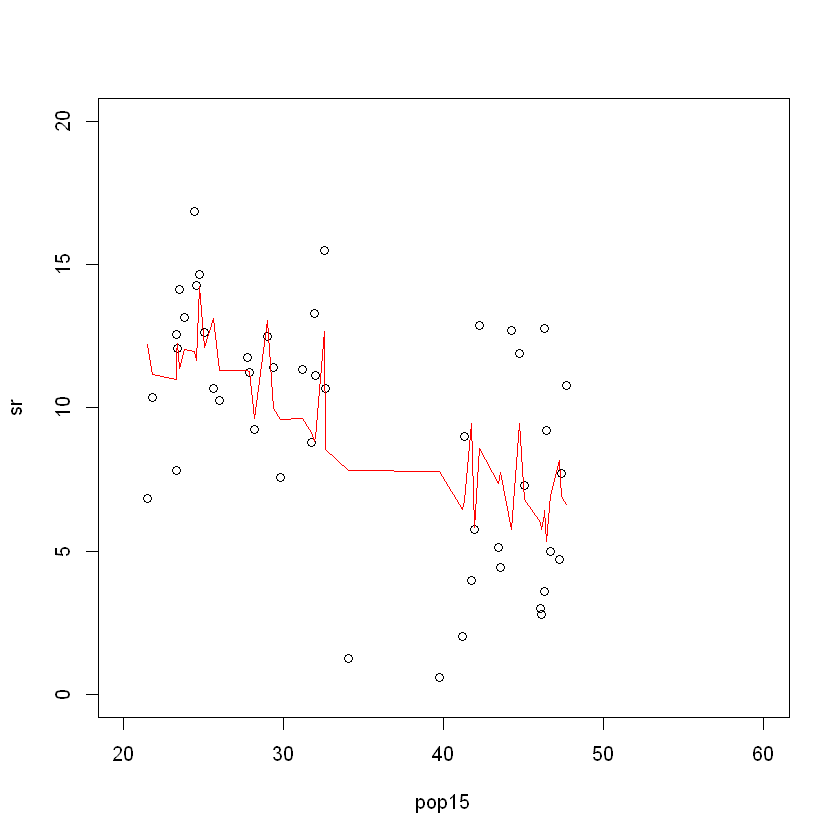

In [36]:
newdat = data.frame(sr, ddpi, pop15)
newdat = newdat[order(pop15),] 
pred = predict(models$combined_model_1, newdata = newdat)
plot(sr ~ pop15, xlim = c(20, 60), ylim = c(0, 20))
with(newdat, lines(x = pop15, y = pred, col = 'red'))

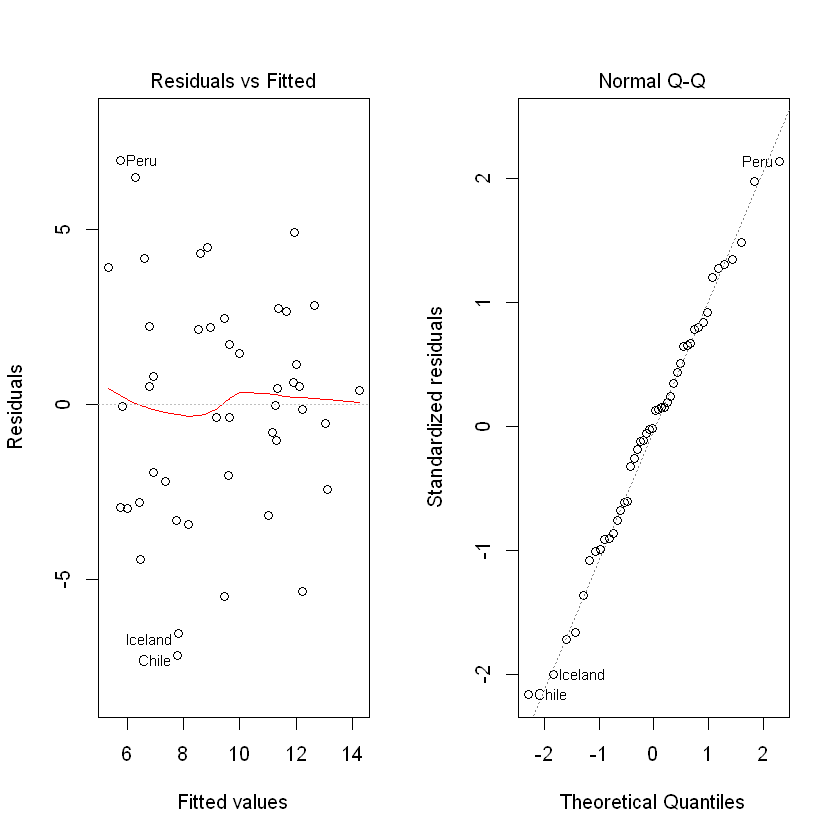

In [40]:
layout(matrix(1:2,ncol=2))
plot(models$combined_model_1, which = 1)
plot(models$combined_model_1, which = 2)

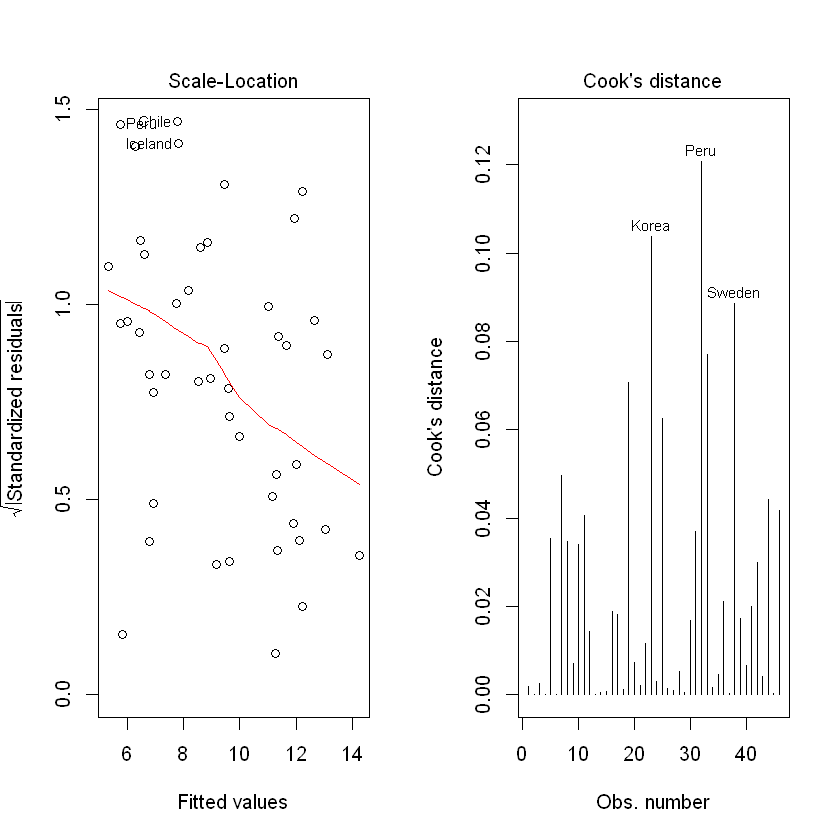

In [41]:
layout(matrix(1:2,ncol=2))
plot(models$combined_model_1, which = 3)
plot(models$combined_model_1, which = 4)

In [42]:
models$combined_model_2 = lm(sr ~ dpi + ddpi + I(dpi*(dpi < 400)) + I(((dpi) + I(dpi^3))*(dpi > 700)*(dpi < 2700)) + log(pop15), data = LifeCycleSavings)

In [43]:
summary(models$combined_model_2)


Call:
lm(formula = sr ~ dpi + ddpi + I(dpi * (dpi < 400)) + I(((dpi) + 
    I(dpi^3)) * (dpi > 700) * (dpi < 2700)) + log(pop15), data = LifeCycleSavings)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4073 -1.7470  0.2021  1.7768  5.9337 

Coefficients:
                                                     Estimate Std. Error
(Intercept)                                         2.481e+01  1.240e+01
dpi                                                -1.248e-03  8.005e-04
ddpi                                                6.339e-01  2.770e-01
I(dpi * (dpi < 400))                               -1.085e-02  5.287e-03
I(((dpi) + I(dpi^3)) * (dpi > 700) * (dpi < 2700))  2.121e-10  1.278e-10
log(pop15)                                         -4.526e+00  3.299e+00
                                                   t value Pr(>|t|)  
(Intercept)                                          2.001   0.0522 .
dpi                                                 -1.559   0.1268  
ddpi          

In [44]:
fmsb::VIF(models$combined_model_2)
AIC(models$combined_model_2)
BIC(models$combined_model_2)

[1] 1.831747

[1] 245.8874

[1] 258.6879

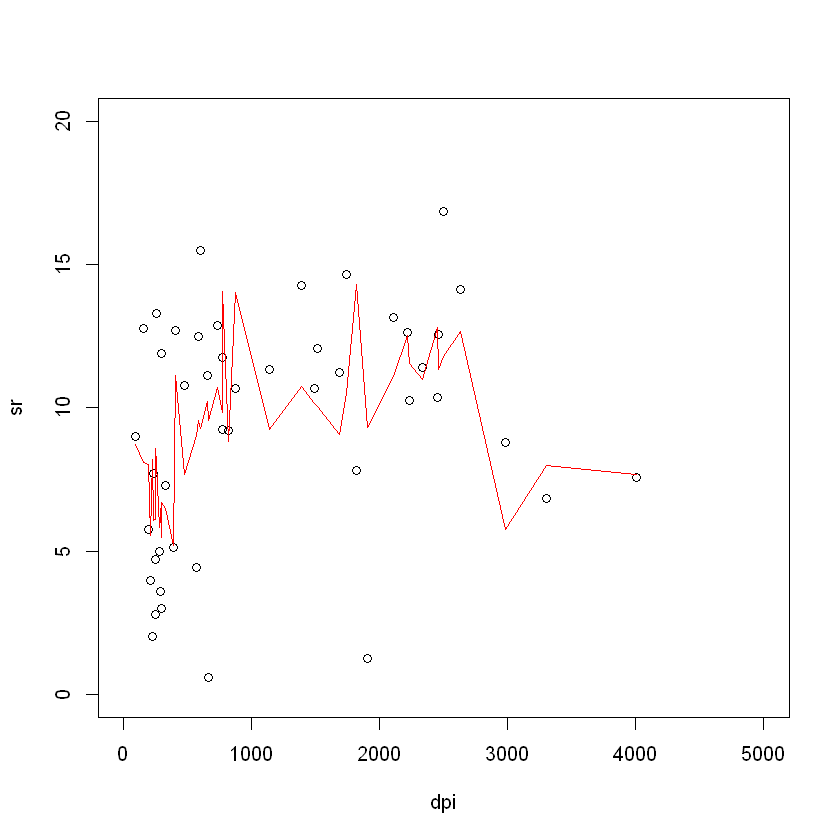

In [45]:
newdat = data.frame(sr, dpi, pop15)
newdat = newdat[order(dpi),] 
pred = predict(models$combined_model_2, newdata = newdat)
plot(sr ~ dpi, xlim = c(0, 5000), ylim = c(0, 20))
with(newdat, lines(x = dpi, y = pred, col = 'red'))

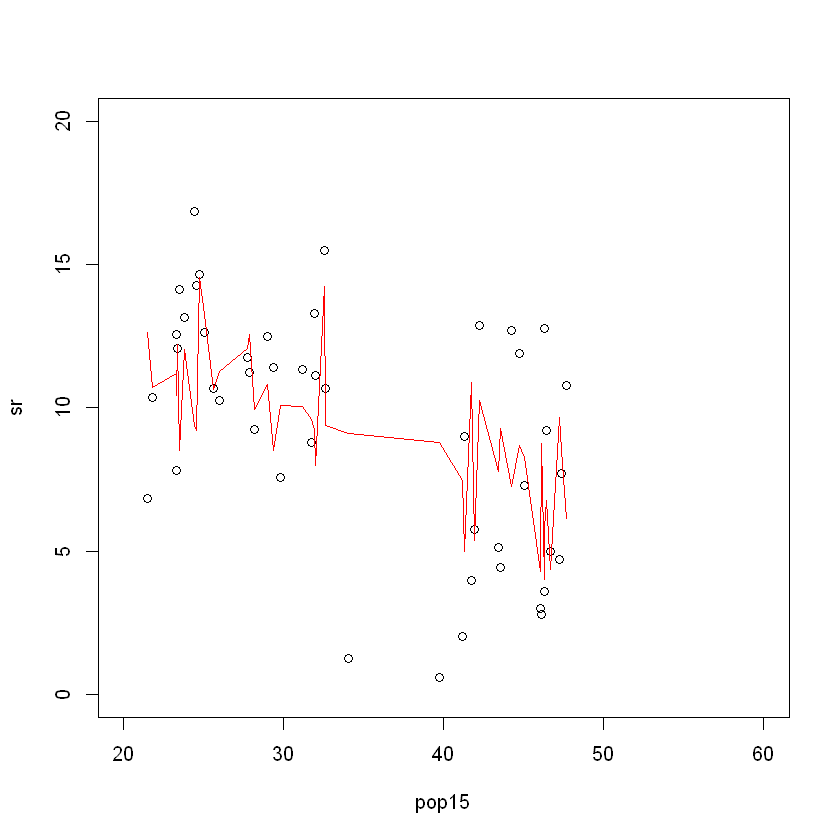

In [46]:
newdat = data.frame(sr, ddpi, pop15)
newdat = newdat[order(pop15),] 
pred = predict(models$combined_model_2, newdata = newdat)
plot(sr ~ pop15, xlim = c(20, 60), ylim = c(0, 20))
with(newdat, lines(x = pop15, y = pred, col = 'red'))

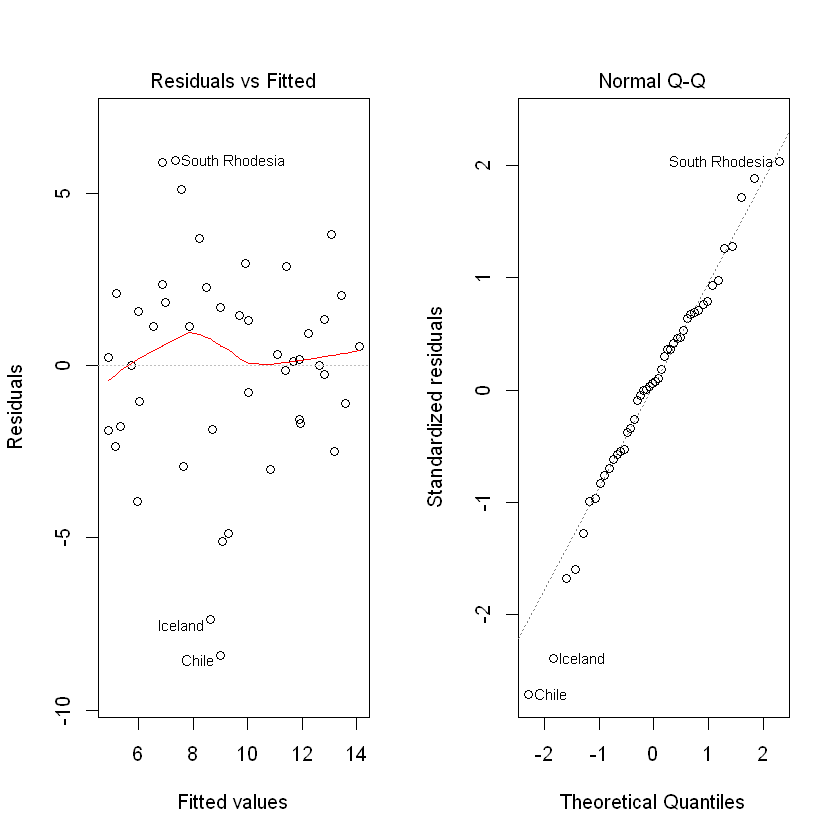

In [47]:
layout(matrix(1:2,ncol=2))
plot(models$combined_model_2, which = 1)
plot(models$combined_model_2, which = 2)

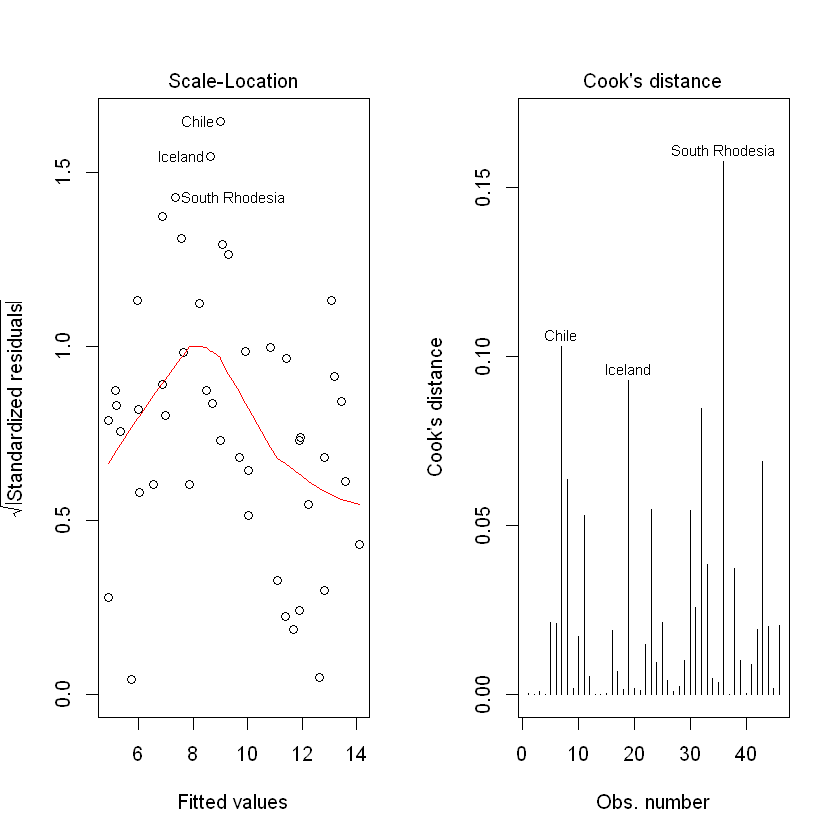

In [48]:
layout(matrix(1:2,ncol=2))
plot(models$combined_model_2, which = 3)
plot(models$combined_model_2, which = 4)

### Baseline

In [958]:
summary(models$default_model)


Call:
lm(formula = sr ~ pop15 + pop75 + dpi + ddpi, data = LifeCycleSavings)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4322 -2.5530  0.0013  1.8719  6.8596 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) 17.4460350  8.1259206   2.147   0.0378 *
pop15       -0.2634010  0.1558210  -1.690   0.0985 .
pop75       -0.1144137  1.1250593  -0.102   0.9195  
dpi         -0.0005238  0.0008458  -0.619   0.5391  
ddpi         0.5820956  0.2964950   1.963   0.0564 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.434 on 41 degrees of freedom
Multiple R-squared:  0.3663,	Adjusted R-squared:  0.3044 
F-statistic: 5.924 on 4 and 41 DF,  p-value: 0.0007397


In [1080]:
AIC(models$default_model)
BIC(models$default_model)

[1] 250.7486

[1] 261.7205

Warning message in abline(models$default_model):
"only using the first two of 5 regression coefficients"Warning message in abline(models$default_model):
"only using the first two of 5 regression coefficients"

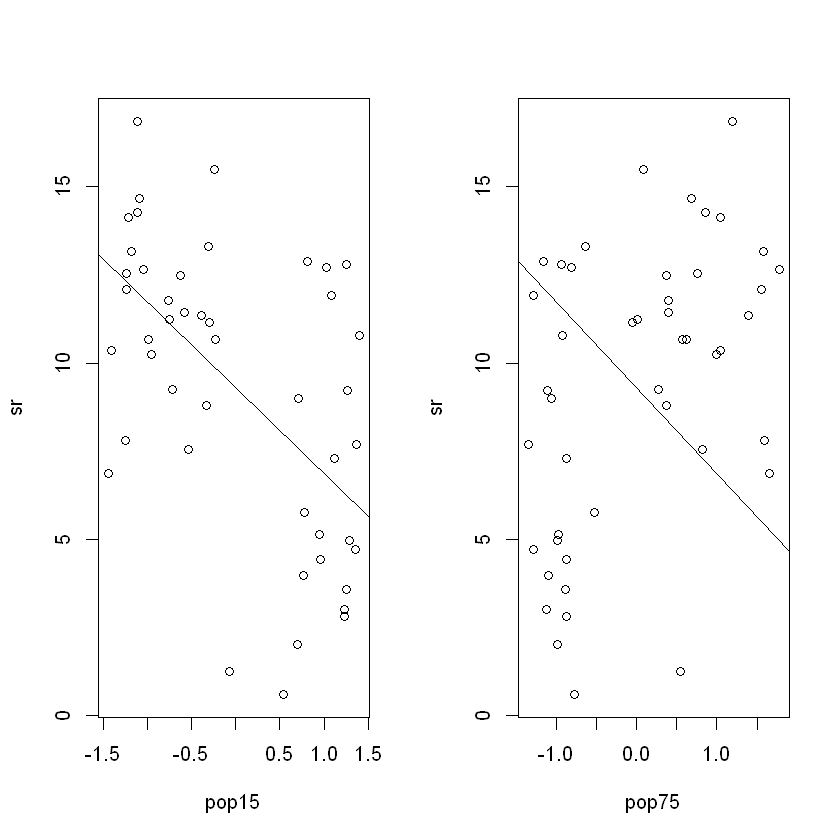

In [397]:
layout(matrix(1:2,ncol=2))
plot(sr ~ pop15, data = LifeCycleSavings)
abline(models$default_model)
plot(sr ~ pop75, data = LifeCycleSavings)
abline(models$default_model)

Warning message in abline(models$default_model):
"only using the first two of 5 regression coefficients"Warning message in abline(models$default_model):
"only using the first two of 5 regression coefficients"

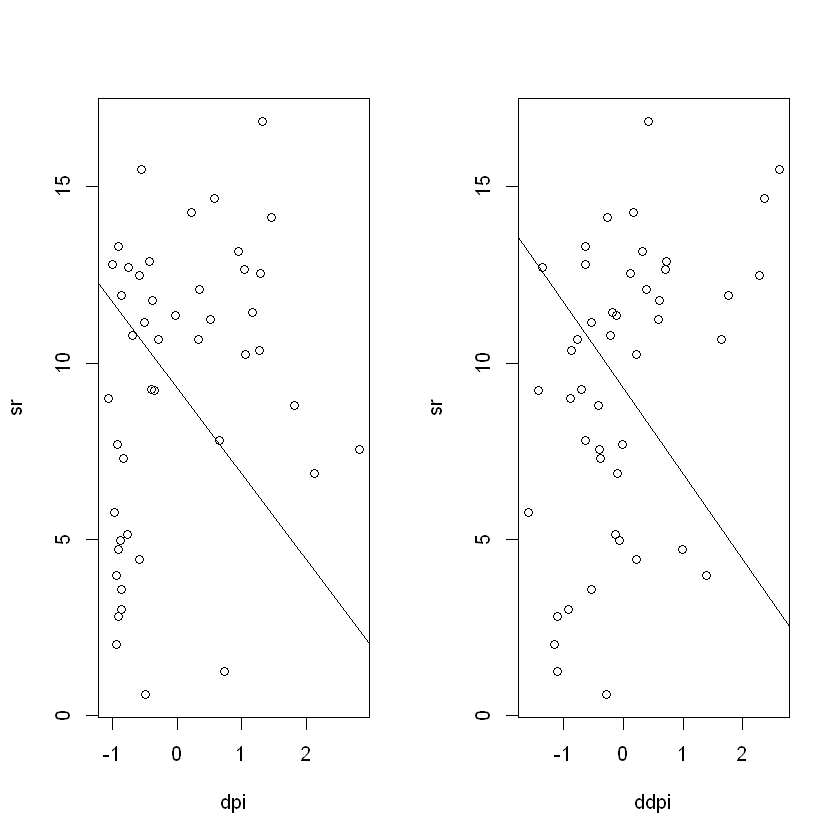

In [398]:
layout(matrix(1:2,ncol=2))
plot(sr ~ dpi, data = LifeCycleSavings)
abline(models$default_model)
plot(sr ~ ddpi, data = LifeCycleSavings)
abline(models$default_model)

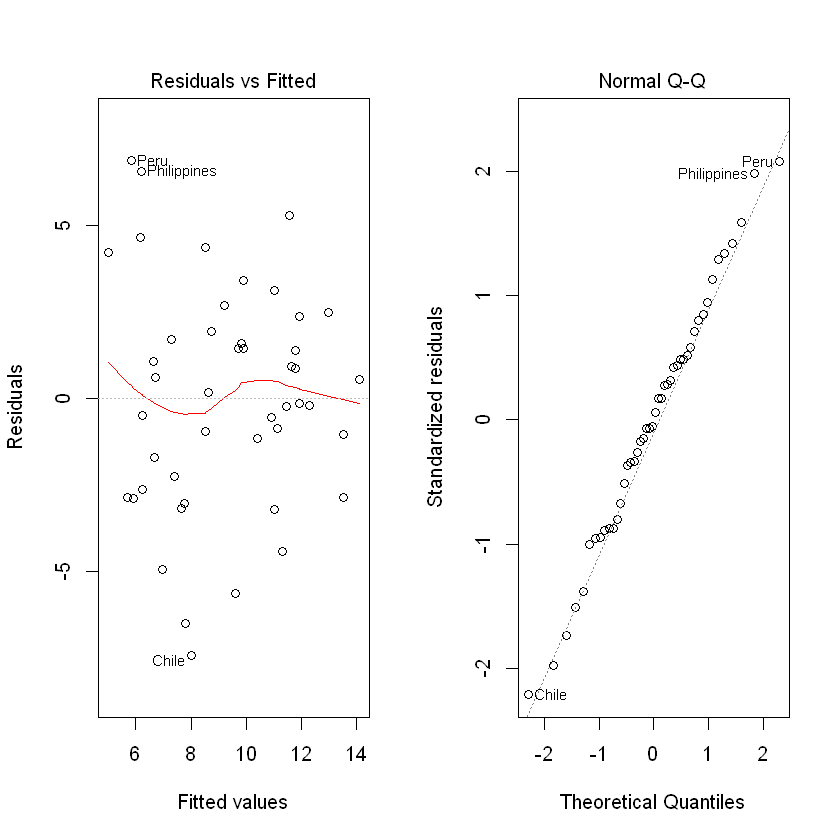

In [399]:
layout(matrix(1:2,ncol=2))
plot(models$default_model, which = 1)
plot(models$default_model, which = 2)

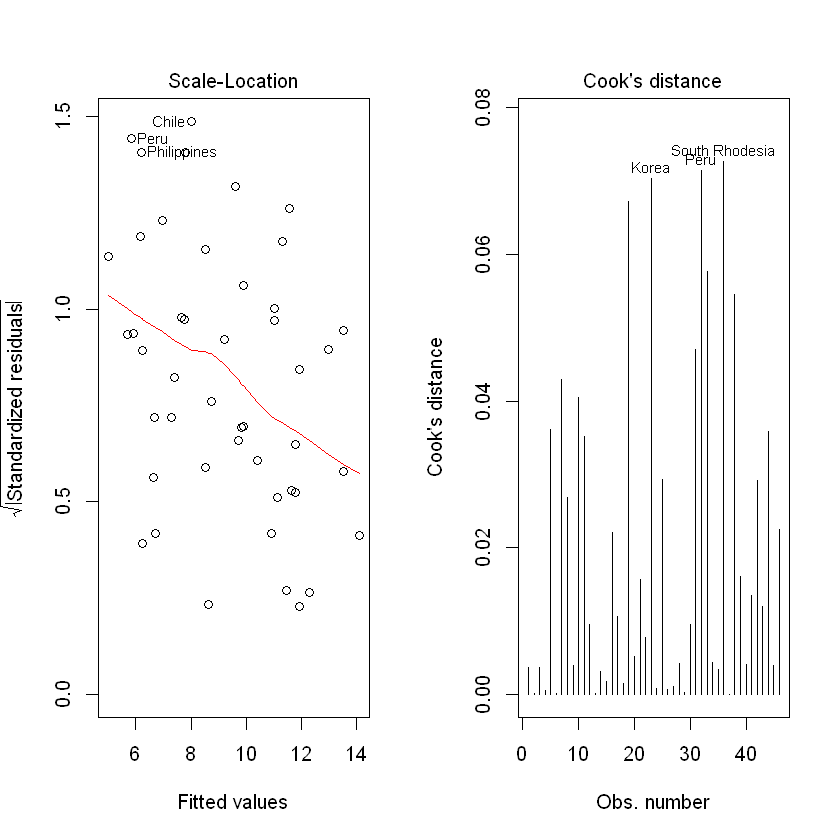

In [400]:
layout(matrix(1:2,ncol=2))
plot(models$default_model, which = 3)
plot(models$default_model, which = 4)

- Zambia, Jamaica, Japan and Libya could be **outliers**.

- The threshold for cook's distance is 4/(46 - 4 - 1) which is around 0.098 

In [401]:
# Inspect for collinearity
fmsb::VIF(models$default_model)

[1] 1.577928